**5, 6 y 7 no se hacen**

- $N_k$: Número de canales
- $N_{ok}$: Número de canales abiertos

![image.png](image.png)


## 1.
Modificar el código de Python, implementado durante el desarrollo de la guía “Modelización por analogías”, a fin de implementar el modelo HH simulando la conductancia de potasio a través de un conjunto de canales iónicos estocásticos, utilizando el método de simulación estadística

$g_{Kest}=\bar{g_k}\frac{N_{ok}}{N_k}$

In [1]:
import random

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt



# print(canales[:5])
# 
def actualizar_estado(canales, alpha, beta, dt):
	for i in range(len(canales)):
		for j in range(len(canales[i][0])):
			if canales[i][0][j] == 1:
				if np.random.rand() < beta * dt:
					canales[i][0][j] = 0
					# print("Se modifico subunidad")
			else:
				if np.random.rand() < alpha * dt:
					# print("Se modifico subunidad")
					canales[i][0][j] = 1
		# print("---------")

		count = 0
		for subunidad in canales[i][0]:	
			if subunidad == 1:
				count += 1
		
		if count != 4 and count != 0:
			# print(count)
			pass

		if count == 4:
			canales[i][1] = 1
		else:
			canales[i][1] = 0

	print(count_abiertos(canales))
	return canales 


def count_abiertos(canales):
	count = 0
	
	# for i in range(len(canales)):
	# 	if canales[i][0] is True and\
	# 		canales[i][1] is True and\
	# 		canales[i][2] is True and\
	# 		canales[i][3] is True:
	# 		count+=1

	for i in range(len(canales)):
		if canales[i][1] == 1:
			count+=1

	return count

def g_k_est(tasa_canales_abiertos):
	return gK_cte * tasa_canales_abiertos

/home/justo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

gNa_cte = 120 #ms/cm²
gK_cte = 36
gL_cte = 0.3

ENa = 45.0 #mV
EK = -82.0
EL = -59.0

C_m = 1.0 #\muAms/cm²


def alpha_m(V):
	return ((V+45)*0.1)/(1-pow(np.e, ((-1*(V+45))/10)))

def alpha_h(V):
	return 0.07 * pow(np.e, (-1*(V+70)/20))

def alpha_n(V):
	return ((V+60)*0.01)/(1-pow(np.e, ((-1*(V+60))/10)))

def beta_m(V):
	return 4*pow(np.e, ((-1*(V+70))/18))

def beta_h(V):
	return 1/(1+pow(np.e, ((-1*(V+40))/10)))

def beta_n(V):
	return 0.125*pow(np.e, ((-1*(V+70))/80))


def dm_dt(V, m):
	return alpha_m(V)*(1-m)-beta_m(V)*m

def dh_dt(V, h):
	return alpha_h(V)*(1-h)-beta_h(V)*h

def dn_dt(V, n):
	return alpha_n(V)*(1-n)-beta_n(V)*n

def gNa(m, h):
	return gNa_cte*(pow(m, 3))*h

def gK(n):
	return gK_cte*(pow(n, 4))

def g(gNa, gK, gL):
	return gNa + gK + gL

def Em(gNa, gK, gL):
	return (gNa*ENa + gK * EK + gL * EL) / (gNa + gK + gL)

# def dv_dt(I, v, gK, gNa, gL):
# 	return (I - gK * (v + EK) - gNa * (v - ENa) - gL * (v + EL)) / C_m


def dv_dt(I, v, gK, gNa, gL):
	return I - g(gNa, gK, gL) * (v - Em(gNa, gK, gL)) / C_m

def euler(ts, m_0, h_0, n_0, v_0, I_s, canales):
	canales = canales
	dt = ts[1] - ts[0]
	# print(dt)
	v_s = np.zeros(len(ts))
	m_s = np.zeros(len(ts))
	n_s = np.zeros(len(ts))
	h_s = np.zeros(len(ts))
	gNa_s = np.zeros(len(ts))
	gK_s = np.zeros(len(ts))
	v_s[0] = v_0
	m_s[0] = m_0
	h_s[0] = h_0
	n_s[0] = n_0 
	gNa_s[0] = gNa(m_s[0], h_s[0])
	gK_s[0] = gK(n_s[0])
	tasa = count_abiertos(canales)/N_canales
	print(count_abiertos(canales))
	# gK_s[0] = g_k_est(tasa)

	gL = gL_cte
	
	# print(f"gNa(0)={gNa_s[0]}\ngK(0)={gK_s[0]}\ngL={gL_cte}")
	for i in range(1, len(ts)):
		m_s[i] = m_s[i-1] + dt * dm_dt(v_s[i-1], m_s[i-1])
		n_s[i] = n_s[i-1] + dt * dn_dt(v_s[i-1], n_s[i-1])
		h_s[i] = h_s[i-1] + dt * dh_dt(v_s[i-1], h_s[i-1])

		gNa_s[i] = gNa(m_s[i], h_s[i])
		# gK_s[i] = gK(n_s[i])
		canales = actualizar_estado(canales, alpha_n(v_s[i-1]), beta_n(v_s[i-1]), dt)
		tasa = count_abiertos(canales)/N_canales
		print(count_abiertos(canales))
		gK_s[i] = g_k_est(tasa)

		v_s[i] = v_s[i-1] + dt * dv_dt(I_s[i], v_s[i-1], gK_s[i], gNa_s[i], gL)

	return v_s, gNa_s, gK_s, m_s, n_s, h_s

m(0)=0.0529324852572496
n(0)=0.317676914060697
h(0)=0.596120753508459
497
497
497
497
497
497
497
497
497
497
497
497
497
496
496
496
496
496
496
496
496
496
496
495
495
494
494
493
493
492
492
492
492
492
492
491
491
491
491
490
490
490
490
490
490
490
490
490
490
489
489
489
489
489
489
488
488
488
488
488
488
488
488
488
488
488
488
488
488
487
487
486
486
486
486
485
485
485
485
484
484
483
483
483
483
482
482
482
482
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
478
478
478
478
478
478
478
478
478
478
478
478
476
476
476
476
475
475
475
475
475
475
475
475
474
474
474
474
474
474
474
474
474
474
474
474
474
474
474
474
474
474
472
472
472
472
471
471
471
471
471
471
471
471
471
471
471
471
471
471
470
470
469
469
469
469
469
469
469
469
466
466
466
466
466
466
466
466
466
466
466
466
466
466
465
465
465
465
465
465
465
465
465
465
465
465
464
464
463
46

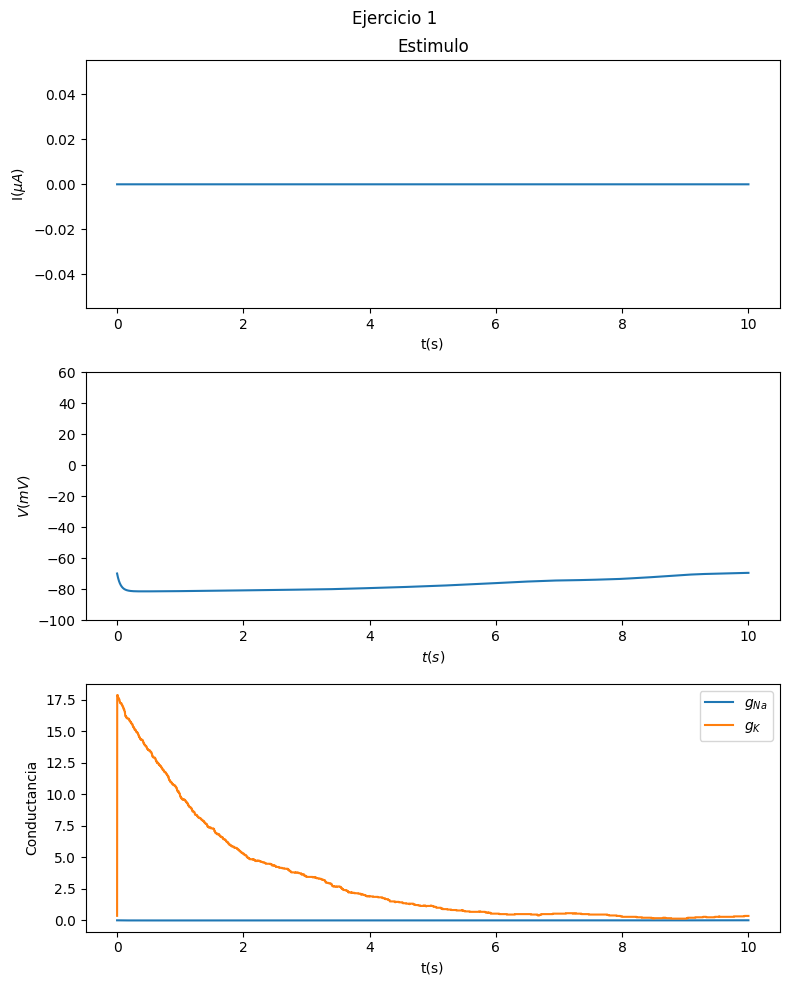

In [5]:
pot_reposo = -70.0

alpha_m_0 = alpha_m(pot_reposo)
alpha_h_0 = alpha_h(pot_reposo)
alpha_n_0 = alpha_n(pot_reposo)

beta_m_0 = beta_m(pot_reposo)
beta_h_0 = beta_h(pot_reposo)
beta_n_0 = beta_n(pot_reposo)

m_sp = sp.Symbol('m')
m_0 = sp.solve(sp.Eq(alpha_m_0*(1-m_sp)-beta_m_0*m_sp, 0))[0]
h_sp = sp.Symbol('h')
h_0 = sp.solve(sp.Eq(alpha_h_0*(1-h_sp)-beta_h_0*h_sp, 0))[0]
n_sp = sp.Symbol('n')
n_0 = sp.solve(sp.Eq(alpha_n_0*(1-n_sp)-beta_n_0*n_sp, 0))[0]

print(f"m(0)={m_0}\nn(0)={n_0}\nh(0)={h_0}")

paso = 0.001
ts = np.arange(0, 10, paso)


Is1 = np.zeros(len(ts))

N_canales = 1000
subunidades = 4

canales_ej1 = [[[0 for j in range(subunidades)], 0] for i in range(N_canales)]

for canal in canales_ej1:
	rand = random.random()
	if rand < 0.5:
		canal[1] = 1
		canal[0] = [1 for i in range(subunidades)]
		
vs, gNa_s, gK_s, m_s, n_s, h_s = euler(ts, m_0, h_0, n_0, pot_reposo, Is1, canales_ej1)

# Crear la figura y los ejes
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Título de la figura
fig.suptitle("Ejercicio 1")

# Primer subplot
axs[0].set_title("Estimulo")
axs[0].plot(ts, Is1)
axs[0].set_ylabel(r"I($\mu A$)")
axs[0].set_xlabel("t(s)")

# Segundo subplot
axs[1].plot(ts, vs)
axs[1].set_ylabel(r"$V(mV)$")
axs[1].set_xlabel(r"$t(s)$")
axs[1].set_ylim(-100, 60)

# Tercer subplot
axs[2].plot(ts, gNa_s, label=r"$g_{Na}$")
axs[2].plot(ts, gK_s, label=r"$g_{K}$")
axs[2].legend()
axs[2].set_ylabel("Conductancia")
axs[2].set_xlabel("t(s)")
# axs[2].set_ylim(0, 1)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 2.
Obtener la evolución de $V$, $g_{Na}$ y $g_{Kest}$ cuando se aplica un pulso de potencial ${dV=15mV}$ a los $5mseg$ de simulación. De manera similar al caso anterior, $V=-70mV$ para la neurona en estado estable.

504
504
504
503
503
503
503
503
503
503
503
503
503
503
503
503
503
502
502
501
501
501
501
500
500
500
500
499
499
499
499
499
499
499
499
499
499
499
499
497
497
497
497
497
497
497
497
497
497
496
496
496
496
495
495
495
495
495
495
495
495
495
495
494
494
494
494
494
494
494
494
493
493
493
493
492
492
492
492
492
492
491
491
491
491
490
490
489
489
487
487
487
487
487
487
487
487
487
487
486
486
486
486
486
486
485
485
485
485
484
484
484
484
484
484
484
484
484
484
484
484
483
483
483
483
483
483
483
483
482
482
482
482
482
482
482
482
482
482
482
482
482
482
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
480
480
480
480
480
480
480
480
479
479
479
479
479
479
479
479
478
478
478
478
478
478
477
477
477
477
477
477
476
476
474
474
474
474
474
474
474
474
473
473
473
473
473
473
473
473
473
473
472
472
470
470
470
470
470
470
470
470
470
470
470
470
470
470
469
469
469
469
469
469
468
468
468
468
468
468
468
468
467
467
467
467
467
467
467
467
467
467
467
467
467


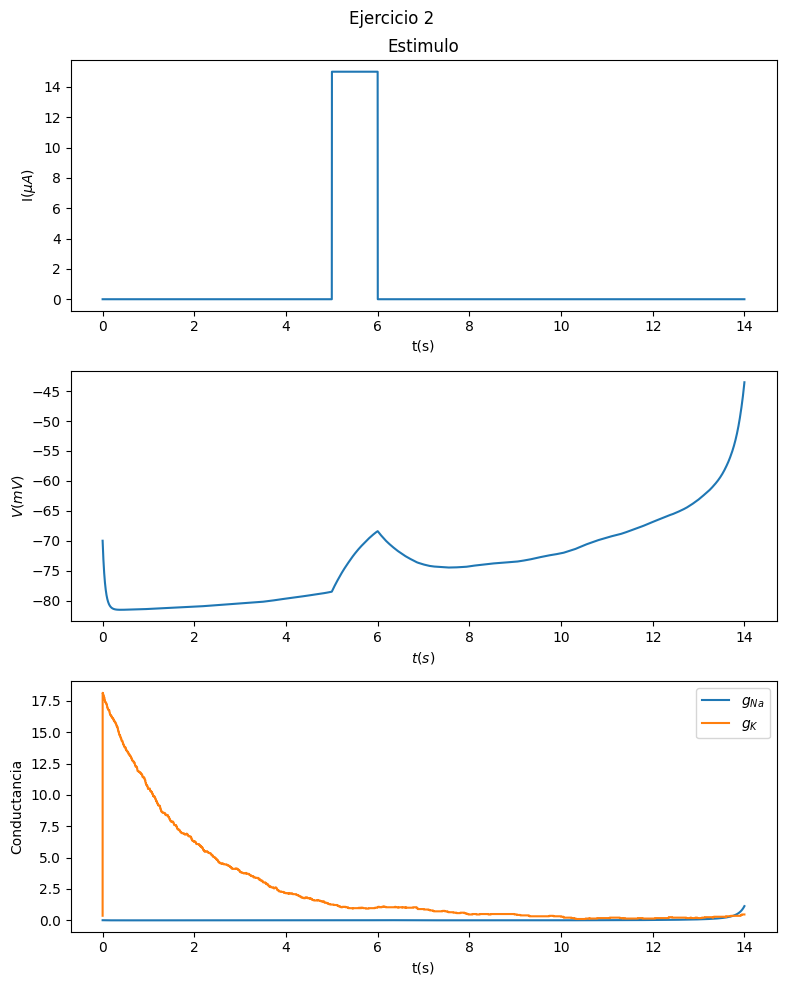

In [9]:
paso = 0.001
ts = np.arange(0, 14, paso)


Is1 = np.zeros(len(ts))
Is1[int(5/paso):int(6/paso)] = [15] * len(Is1[int(5/paso):int(6/paso)])

N_canales = 1000
subunidades = 4

canales_ej2 = [[[0 for j in range(subunidades)], 0] for i in range(N_canales)]

for canal in canales_ej2:
	rand = random.random()
	if rand < 0.5:
		canal[1] = 1
		canal[0] = [1 for i in range(subunidades)]

vs, gNa_s, gK_s, m_s, n_s, h_s = euler(ts, m_0, h_0, n_0, pot_reposo, Is1, canales_ej2)

# Crear la figura y los ejes
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Título de la figura
fig.suptitle("Ejercicio 2")

# Primer subplot
axs[0].set_title("Estimulo")
axs[0].plot(ts, Is1)
axs[0].set_ylabel(r"I($\mu A$)")
axs[0].set_xlabel("t(s)")

# Segundo subplot
axs[1].plot(ts, vs)
axs[1].set_ylabel(r"$V(mV)$")
axs[1].set_xlabel(r"$t(s)$")
axs[1].set_ylim()

# Tercer subplot
axs[2].plot(ts, gNa_s, label=r"$g_{Na}$")
axs[2].plot(ts, gK_s, label=r"$g_{K}$")
axs[2].legend()
axs[2].set_ylabel("Conductancia")
axs[2].set_xlabel("t(s)")

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 3.
Modelar la conductancia de potasio utilizando N = 10, 100 y 1000 canales iónicos y comparar.

In [ ]:
ns = [10, 100, 1000]

paso = 0.001
ts = np.arange(0, 10, paso)


Is1 = np.zeros(len(ts))

for n in ns:
	N_canales = n
	subunidades = 4

	canales_ej1 = [[[0 for j in range(subunidades)], 0] for i in range(N_canales)]

	for canal in canales_ej1:
		rand = random.random()
		if rand < 0.5:
			canal[1] = 1
			canal[0] = [1 for i in range(subunidades)]
			
	vs, gNa_s, gK_s, m_s, n_s, h_s = euler(ts, m_0, h_0, n_0, pot_reposo, Is1, canales_ej1)

	# Crear la figura y los ejes
	fig, axs = plt.subplots(3, 1, figsize=(8, 10))

	# Título de la figura
	fig.suptitle(f"N = {n}")

	# Primer subplot
	axs[0].set_title("Estimulo")
	axs[0].plot(ts, Is1)
	axs[0].set_ylabel(r"I($\mu A$)")
	axs[0].set_xlabel("t(s)")

	# Segundo subplot
	axs[1].plot(ts, vs)
	axs[1].set_ylabel(r"$V(mV)$")
	axs[1].set_xlabel(r"$t(s)$")
	axs[1].set_ylim(-100, 60)

	# Tercer subplot
	axs[2].plot(ts, gNa_s, label=r"$g_{Na}$")
	axs[2].plot(ts, gK_s, label=r"$g_{K}$")
	axs[2].legend()
	axs[2].set_ylabel("Conductancia")
	axs[2].set_xlabel("t(s)")
	# axs[2].set_ylim(0, 1)

	# Ajustar el espacio entre subplots
	plt.tight_layout()

	# Mostrar el gráfico
	plt.show()